In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from typing import Callable, List, Tuple

In [31]:
class Function:
    def __init__(self, func: Callable, x0: np.float16, x1: np.float16, epsilon: np.float16, maxit: int=20, derivative: Callable=None):
        """
        ARGS:
            func = Função analisada **(deve ser passada como função lambda)**
            x0 = Valor de x0 (menor)
            x1 = Valor de x1 (maior)
            epsilon = Tolerância de erro
            maxit = Máximo de iterações
            derivative (opcional) = Derivada da função **(essencial para o método de Newton)**
        """
        self.func = func
        self.x0 = x0
        self.x1 = x1
        self.epsilon = epsilon
        self.maxit = maxit
        self.derivative = derivative

    def _table(self, data: List[float], titles: List[str]) -> pd.DataFrame:
        """
        Cria a tabela com as informações de cada iteração

        ARGS:
            title = Título da tabela
            values = Valores da tabela
        """
        pd.options.display.float_format = '{:.5E}'.format
        return pd.DataFrame(data, columns=titles)
    
    def _graph(self, df: pd.DataFrame) -> None:
        """
        Imprime a o gráfico de convergência da função.

        ARGS:
            df = Dataframe gerado pelo método numérico
        """
        iter = np.linspace(0, self.maxit, self.maxit)
        plt.close("all")
        plt.plot(iter, df["f(xk)"])
        plt.xlabel("Número de iterações")
        plt.ylabel("Valor de f(x)")
        plt.grid()
        plt.show()

    def printFormated(self, df: pd.DataFrame) -> None:
        """
        Imprime a tabela segundo a formatação requisitada pelo exercício.

        ARGS:
            df = Dataframe gerado pelo método numérico
        """
        print(df.to_string(index=False, justify='center'))

    def bisect(self) -> Tuple[float, pd.DataFrame]:
        """
        Calcula a aproximação da raiz da função pelo método da bisseção.
        """
        # Variáveis iniciais
        a, b = self.x0, self.x1
        table_title = ['k', 'xk', 'f(xk)', 'step']
        table = []
        # Loop principal
        for i in range(self.maxit):
            step = abs(b - a)
            # Bisseção
            xk = (a + b) / 2
            f_xk = self.func(xk)
            table.append([i + 1, xk, f_xk, step])
            # Lógica de redução
            if (self.func(a) * f_xk < 0):
                b = xk
            else:
                a = xk

            if (step < self.epsilon):
                break
            
        full_table = self._table(table, table_title)
        self._graph(full_table)
        return f_xk, full_table

    def newton(self) -> Tuple[float, pd.DataFrame]:
        """
        Calcula a aproximação da raiz da função pelo método de Newton.
        """
        # Verificação inicial, a fim de evitar erro de divisão por None
        if not callable(self.derivative):
            raise ValueError("A derivada da função (derivative) não foi fornecida ou não é uma função.")
        # Variáveis iniciais  
        xk = self.x0
        table_title = ['k', 'xk', 'f(xk)', 'f\'(xk)', 'step']
        table = []
        # Loop principal
        for i in range(self.maxit):
            _xk = xk
            f_xk = self.func(xk)
            f_dxk = self.derivative(xk)
            xk = xk - (f_xk / f_dxk) # x_{k+1}
            step = abs(xk - _xk)

            table.append([i + 1, xk, self.func(xk), self.derivative(xk), step])

        full_table = self._table(table, table_title)
        self._graph(full_table)
        return self.func(xk), full_table

    def secant(self) -> Tuple[float, pd.DataFrame]:
        """
        Calcula a aproximação da raiz da função pelo método da secante.
        """
        # Variáveis iniciais
        xk0, xk1 = self.x0, self.x1
        table = []
        table_title = ['k', 'xk', 'f(xk)', 'step']
        # Loop principal
        for i in range(self.maxit):
            f_xk0 = self.func(xk0)
            f_xk1 = self.func(xk1)

            den = xk0 * f_xk1 - xk1 * f_xk0
            num = f_xk1 - f_xk0

            xk0 = xk1 # x_k se torna x_{k-1}
            xk1 = den / num # x_k se torna x_{k-1}
            step = (xk1 - xk0)

            table.append([i + 1, xk1, self.func(xk1), step])

        full_table = self._table(table, table_title)
        self._graph(full_table)
        return self.func(xk1), full_table

---
primeira função

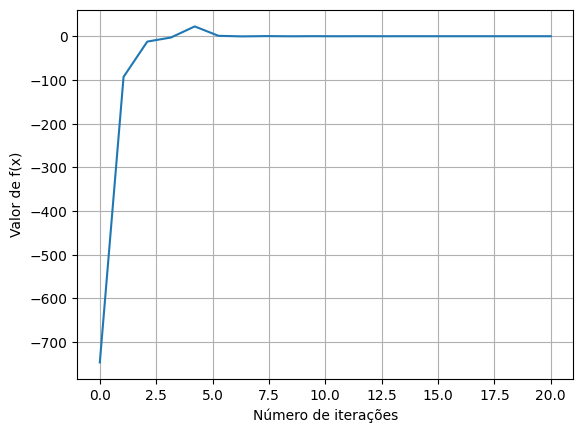

In [32]:
# Variáveis da entrada do método
# IMPORTANTE: SEMPRE DEFINA O TIPO DA VARIÁVEL COMO "FLOAT16"
f1 = lambda x: np.power(x, 3) - x - 3 # função
fd1 = lambda x: 2*np.power(x,2) - 1 # derivada da função
x0_1 = 0.57 # ponto inicial x0 ou extremidade a
x0_2 = 0.62
x1 = np.pi / 2 # ponto inicial x1 ou extremidade b
eps = 10e-8 # tolerância
maxit = 20 # máximo de iterações
func1 = Function(f1, x0_1, x1, eps, maxit=maxit, derivative=fd1)
func2 = Function(f1, x0_2, x1, eps, maxit=maxit, derivative=fd1)
# Aplica o método
app1, df1 = func1.newton()

---
segunda função

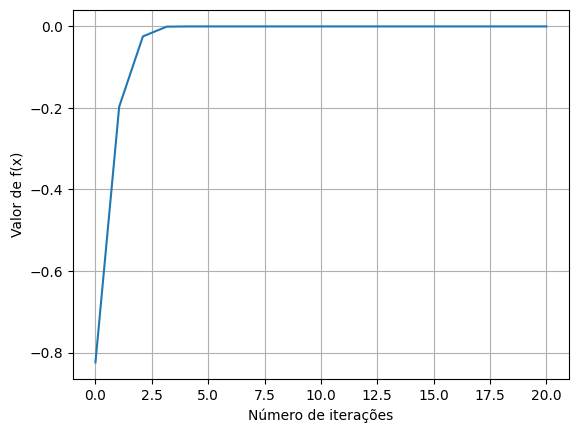

In [33]:
# Variáveis da entrada do método
# IMPORTANTE: SEMPRE DEFINA O TIPO DA VARIÁVEL COMO "FLOAT16"
f2 = lambda x: x*np.exp(-x, dtype="float16") # função
fd2 = lambda x: np.exp(-x, dtype="float16") - x*np.exp(-x, dtype="float16") # derivada da função
x0 = 0.5 # ponto inicial x0 ou extremidade a
x1 = np.pi / 2 # ponto inicial x1 ou extremidade b
eps = 10e-8 # tolerância
maxit = 20 # máximo de iterações
func = Function(f2, x0, x1, eps, maxit=maxit, derivative=fd2)
# Aplica o método
app2, df2 = func.newton()

In [34]:
# Imprime a tabela
func.printFormated(df1)
# Imprime a saída requisitada
print(f"\nSAIDA 1")
it = df1.last_valid_index() + 1
print(f"x_{it} = {df1["xk"][it - 1]}")
print(f"f(x_{it}) = {app1}")
print(f"n = {it}")

# Imprime a tabela
func.printFormated(df2)
# Imprime a saída requisitada
print(f"\nSAIDA 2")
it = df2.last_valid_index() + 1
print(f"x_{it} = {df2["xk"][it - 1]}")
print(f"f(x_{it}) = {app2}")
print(f"n = {it}")

 k      xk          f(xk)       f'(xk)       step   
 1 -9.09535E+00 -7.46322E+02 1.64451E+02 9.66535E+00
 2 -4.55709E+00 -9.30802E+01 4.05341E+01 4.53827E+00
 3 -2.26075E+00 -1.22939E+01 9.22194E+00 2.29634E+00
 4 -9.27636E-01 -2.87060E+00 7.21016E-01 1.33311E+00
 5  3.05369E+00  2.24221E+01 1.76501E+01 3.98133E+00
 6  1.78332E+00  8.88078E-01 5.36049E+00 1.27037E+00
 7  1.61765E+00 -3.84581E-01 4.23360E+00 1.65671E-01
 8  1.70849E+00  2.78507E-01 4.83789E+00 9.08403E-02
 9  1.65092E+00 -1.51242E-01 4.45111E+00 5.75678E-02
10  1.68490E+00  9.83677E-02 4.67780E+00 3.39785E-02
11  1.66387E+00 -5.74723E-02 4.53696E+00 2.10286E-02
12  1.67654E+00  3.58729E-02 4.62159E+00 1.26676E-02
13  1.66878E+00 -2.15149E-02 4.56966E+00 7.76204E-03
14  1.67349E+00  1.32227E-02 4.60113E+00 4.70822E-03
15  1.67061E+00 -8.00678E-03 4.58191E+00 2.87379E-03
16  1.67236E+00  4.89244E-03 4.59359E+00 1.74748E-03
17  1.67130E+00 -2.97306E-03 4.58647E+00 1.06506E-03
18  1.67195E+00  1.81275E-03 4.59080E+00 6.482